In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
!pwd

/Volumes/GoogleDrive/My Drive/Statistics/Python_Statistics


In [3]:
!cd..

/bin/bash: cd..: command not found


In [33]:
df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Statistics/NHANES.csv")

In [34]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [35]:
df.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,...,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,...,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,...,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,...,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,...,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,...,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,...,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [36]:
df.shape

(5735, 28)

In [37]:
# Frequency table for education levels of adults 20+
df.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [38]:
# Finding the missing values
pd.isnull(df.DMDEDUC2).sum()

261

In [39]:
# Replace the gender variable
df['Gender'] = df['RIAGENDR'].replace({1:'Male',2:'Female'})

In [40]:
df.Gender.value_counts()

Female    2976
Male      2759
Name: Gender, dtype: int64

In [41]:
# Count percentage of men and women
x = df.Gender.value_counts()
x/x.sum()

Female    0.518919
Male      0.481081
Name: Gender, dtype: float64

In [42]:
# Body weight variable
pd.isnull(df['BMXWT']).sum()

69

In [43]:
df.BMXWT.describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [44]:
df.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [45]:
# Next, let's look at blood pressure
df.BPXSY1.describe()

count    5401.000000
mean      125.084614
std        18.480873
min        82.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [47]:
# Percentage that have pre-hypertension
np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139))

0.3741935483870968

In [50]:
# Percentage that would have diastolic blood pressure
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

In [51]:
# Percentage that have pre_hypertension or diastolic
a = (df.BPXSY1 >= 120) & (df.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
np.mean(a|b)

0.43975588491717527

Text(0, 0.5, 'Blood pressure in mm/Hg')

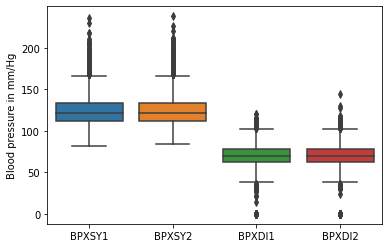

In [57]:
# Create boxplots of 4 blood pressure measurements
sns.boxplot(data = df.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]]).set_ylabel('Blood pressure in mm/Hg')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPXSY1'>

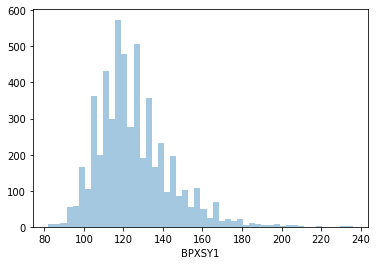

In [61]:
# Create histogram of blood pressue
sns.distplot(df.BPXSY1.dropna(),kde=False)

<AxesSubplot:xlabel='Gender', ylabel='BPXSY1'>

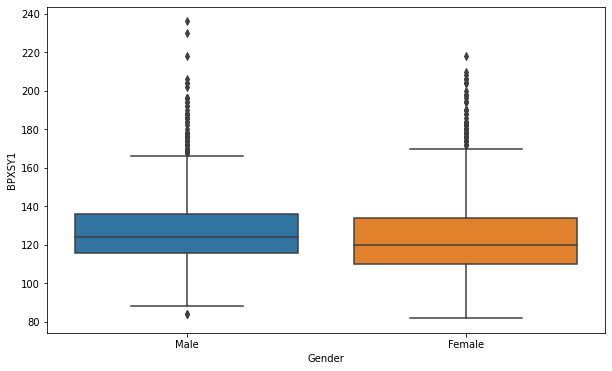

In [70]:
# Create box plot of blood pressure by men vs women
plt.figure(figsize = (10,6))
sns.boxplot( x = 'Gender', y = 'BPXSY1',data = df)

<AxesSubplot:xlabel='age_group', ylabel='BPXSY1'>

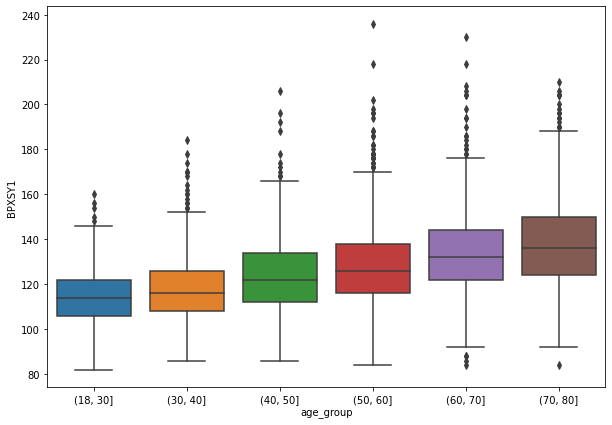

In [80]:
# Stratify the population based on age group. We are going to create new age group
df['age_group'] = pd.cut(df.RIDAGEYR,[18,30,40,50,60,70,80])

# Make a box plot based on these new age groups
plt.figure(figsize = (10,7))
sns.boxplot(x = 'age_group',y = 'BPXSY1',data = df)

<AxesSubplot:xlabel='age_group', ylabel='BPXSY1'>

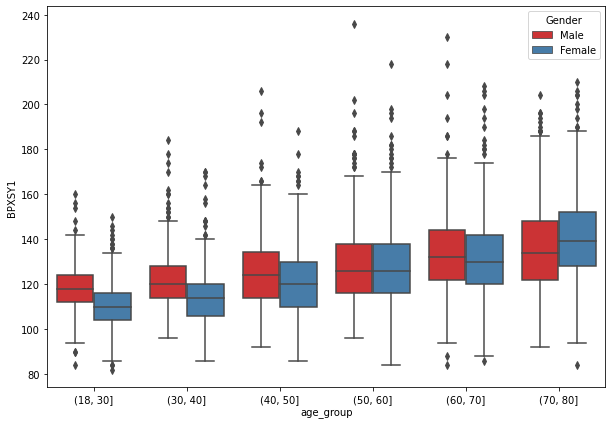

In [74]:
# Stratify the data by age and gender respectively
plt.figure(figsize = (10,7))
sns.boxplot(x = 'age_group', y = 'BPXSY1',hue = 'Gender',data = df,palette = "Set1")

<AxesSubplot:xlabel='Gender', ylabel='BPXSY1'>

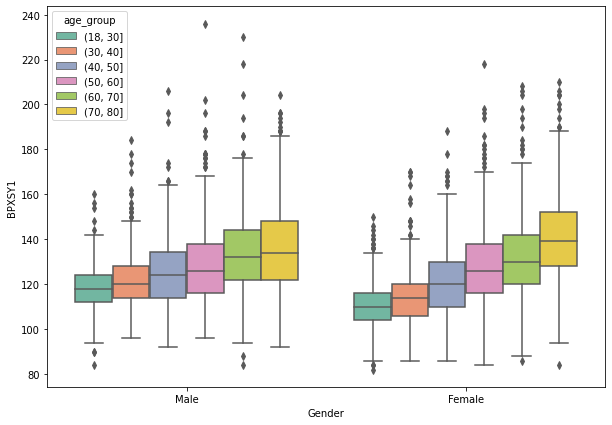

In [77]:
# We can also group the population first by Gender, and then by age group
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Gender',y = 'BPXSY1',hue = 'age_group',data = df,palette = 'Set2')